<a href="https://colab.research.google.com/github/KAILASHVenkat/DMS-Project/blob/main/Adjacency_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

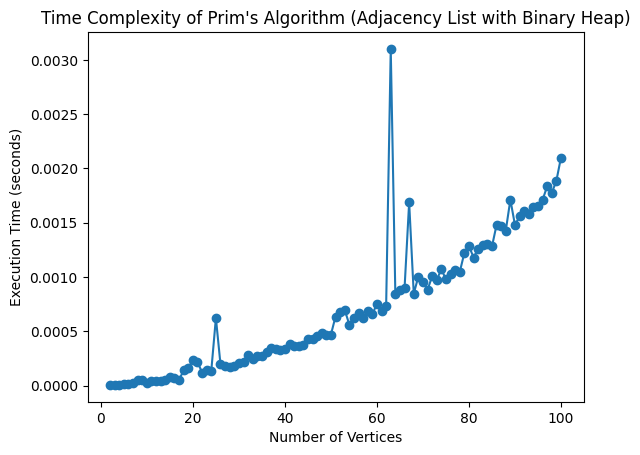

In [12]:
import sys
import time
import matplotlib.pyplot as plt
import random
import heapq

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = {i: [] for i in range(vertices)}

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))

    def prim(self):
        start_time = time.time()  # Measure the start time

        key = [sys.maxsize] * self.V
        parent = [-1] * self.V
        mst_set = [False] * self.V

        key[0] = 0  # Start with the first node
        priority_queue = [(0, 0)]

        while priority_queue:
            current_key, u = heapq.heappop(priority_queue)
            mst_set[u] = True

            for v, weight in self.graph[u]:
                if not mst_set[v] and key[v] > weight:
                    key[v] = weight
                    parent[v] = u
                    heapq.heappush(priority_queue, (key[v], v))

        end_time = time.time()  # Measure the end time
        execution_time = end_time - start_time

        #self.print_mst(parent)

        return execution_time

    #def print_mst(self, parent):
     #   print("Edge \tWeight")
      #  for i in range(1, self.V):
       #     if parent[i] != -1:
        #        print(parent[i], "-", i, "\t", self.graph[parent[i]][self.graph[parent[i]].index((i, self.graph[parent[i]][i][1]))][1])

# Visualize time complexity
def visualize_time_complexity(max_vertices):
    vertices_range = list(range(2, max_vertices + 1))
    execution_times = []

    for v in vertices_range:
        g = Graph(v)
        # Adding edges with random weights for illustration
        for i in range(v):
            for j in range(i + 1, v):
                g.add_edge(i, j, random.randint(1, 10))

        execution_time = g.prim()
        execution_times.append(execution_time)

    plt.plot(vertices_range, execution_times, marker='o')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Time Complexity of Prim\'s Algorithm (Adjacency List with Binary Heap)')
    plt.show()

# Example usage:
visualize_time_complexity(100)
